In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Irisdata = pd.read_csv('iris.csv')

In [3]:
Irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Irisdata.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [5]:
Irisdata['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
x = Irisdata.iloc[: , 0:4]

In [7]:
y = Irisdata.iloc[: , [4]]

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_le = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import tensorflow as tf

In [10]:
y_label = tf.keras.utils.to_categorical(y_le)

In [11]:
y_label

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [12]:
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


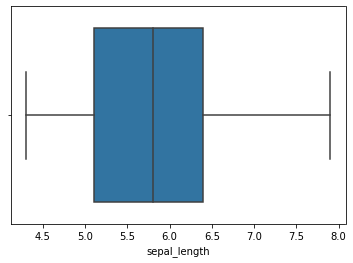

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


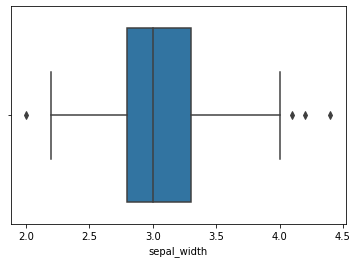

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


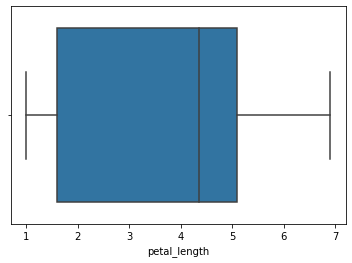

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


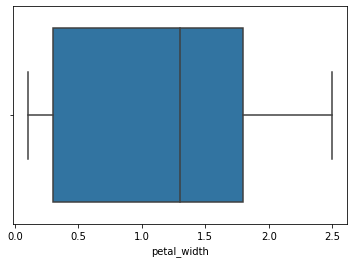

In [13]:
for i in x.columns :
 sns.boxplot(x[i])
 plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
xsacled = sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain , xtest , ytrain ,ytest = train_test_split(xsacled , y_label , random_state = 1  )

In [30]:
seq = tf.keras.models.Sequential()
seq.add(tf.keras.layers.Dense(units = 20 , activation = 'relu' , input_shape = (4,)))

In [31]:
seq.add(tf.keras.layers.Dense(units = 10 , activation = 'relu' ))

In [32]:
seq.add(tf.keras.layers.Dense(units = 10 , activation = 'relu' ))

In [33]:
seq.add(tf.keras.layers.Dense(units = 5 , activation = 'relu' ))

In [34]:
seq.add(tf.keras.layers.Dense(units = 5 , activation = 'relu' ))

In [35]:
seq.add(tf.keras.layers.Dense(units = 3 , activation = 'softmax' ))

In [36]:
seq.compile(
    optimizer = 'adam' ,
    loss = 'categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [37]:
hist = seq.fit(xtrain ,ytrain , epochs = 150 , validation_data = [ xtest , ytest])

Epoch 1/150
4/4 [==============================] - 1s 74ms/step - loss: 1.1128 - accuracy: 0.2857 - val_loss: 1.0975 - val_accuracy: 0.3421
Epoch 2/150
4/4 [==============================] - 0s 13ms/step - loss: 1.1021 - accuracy: 0.2321 - val_loss: 1.0936 - val_accuracy: 0.3158
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 1.0963 - accuracy: 0.2500 - val_loss: 1.0892 - val_accuracy: 0.2632
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 1.0906 - accuracy: 0.3304 - val_loss: 1.0822 - val_accuracy: 0.4474
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 1.0844 - accuracy: 0.4286 - val_loss: 1.0744 - val_accuracy: 0.6053
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 1.0765 - accuracy: 0.5536 - val_loss: 1.0663 - val_accuracy: 0.7105
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 1.0687 - accuracy: 0.6607 - val_loss: 1.0572 - val_accuracy: 0.7632
Epoch 8/150
4/4 [===

In [38]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

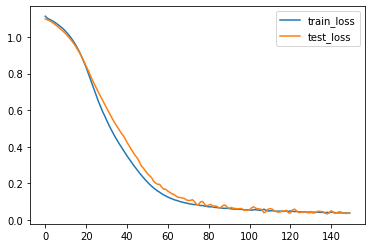

In [41]:
plt.plot(hist.history['loss'] , label = 'train_loss')
plt.plot(hist.history['val_loss'] , label = 'test_loss')
plt.legend()
plt.show()

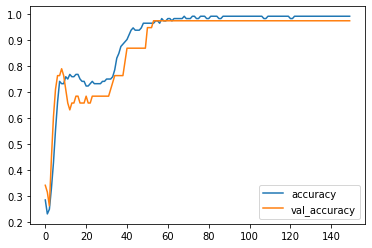

In [42]:
plt.plot(hist.history['accuracy'] , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , label = 'val_accuracy')
plt.legend()
plt.show()